In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_predict
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the Data
train = pd.read_csv('input/train2.csv')
test = pd.read_csv('input/test2.csv')

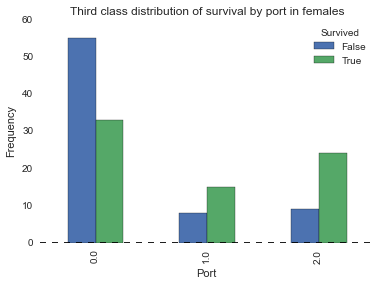

In [8]:
# new possible feature - 3rd class females and port
# Distribution of survival by port in females
pd.crosstab(train.Port[(train.Gender == 0) & (train.Pclass == 3)], train.Survived.astype(bool)).plot(kind='bar')
plt.title('Third class distribution of survival by port in females')
plt.xlabel('Port')
plt.ylabel('Frequency')

# Feature engineering 
## (resulting from visualization and exploration below)

In [3]:
def createNewCol(boolx):
    featx = []
    for i in range(len(boolx)):
        if boolx[i]:
            featx.append(1) 
        else:
            featx.append(0) 

    return featx

In [4]:
# (1) children younger than 18 in the first or second class predominantly survive
bool1 = (train['AgeFill'] < 18) & (train['Pclass'] < 3)
bool1t = (test['AgeFill'] < 18) & (test['Pclass'] < 3)
print(sum(bool1))

train["kidHighClass"] = createNewCol(bool1)
test["kidHighClass"] = createNewCol(bool1t)

35


In [5]:
# (2) mother's with one child in first or second class predominantly survive
bool2 = (train['AgeFill'] > 18) & (train['Parch'] == 1) & (train['Pclass'] < 3) & (train['Gender'] == 0)
bool2t = (test['AgeFill'] > 18) & (test['Parch'] == 1) & (test['Pclass'] < 3) & (test['Gender'] == 0)
print(sum(bool2))

train["momHighClass"] = createNewCol(bool2)
test["momHighClass"] = createNewCol(bool2t)

26


In [6]:
# (3) females in 3rd class embarking at port 1 and 2 (and not port 0) predominantly survive ~%70
bool3 = (train['Pclass'] == 3) & (train['Gender'] == 0) & (train['Port'] == 2)
bool3t = (test['Pclass'] == 3) & (test['Gender'] == 0) & (test['Port'] == 2)
print(sum(bool3))

train["thirdclassfport"] = createNewCol(bool3)
test["thirdclassfport"] = createNewCol(bool3t)

33


In [7]:
# save new training and test features data
train.to_csv('input/train3.csv', index=False)
test.to_csv('input/test3.csv', index=False)

# Data exploration

In [4]:
# create hold-out set

features = list(train.columns.values)[2::]
X_train, X_test, y_train, y_test = train_test_split(train[features], train['Survived'])

In [5]:
X_train.groupby(y_train).mean()

,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill
Survived,,,,,,,
0,2.552058,0.525424,0.326877,0.837772,0.307506,29.560533,20.36607
1,1.948617,0.446640,0.438735,0.316206,0.458498,27.181186,47.10438


In [6]:
X_train.groupby('Pclass').mean()

,SibSp,Parch,Gender,Port,AgeFill,FareFill
Pclass,,,,,,
1,0.367742,0.348387,0.580645,0.412903,36.176903,80.871235
2,0.375887,0.382979,0.560284,0.148936,29.780142,19.404521
3,0.594595,0.372973,0.694595,0.427027,25.078162,13.668962


In [20]:
X_train[['Fare', 'AgeFill']].corr()

,Fare,AgeFill
Fare,1.000000,0.111903
AgeFill,0.111903,1.000000


# Data visualization

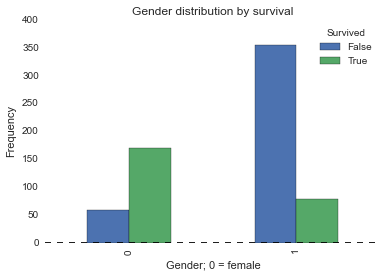

In [29]:
pd.crosstab(X_train.Gender, y_train.astype(bool)).plot(kind='bar')
plt.title('Gender distribution by survival')
plt.xlabel('Gender; 0 = female')
plt.ylabel('Frequency')

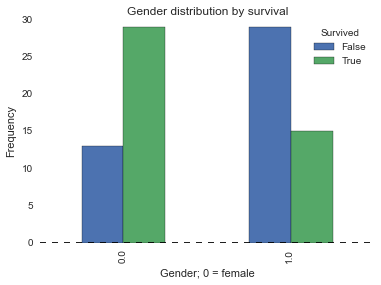

In [30]:
pd.crosstab(X_train.Gender[X_train.AgeFill < 18], y_train.astype(bool)).plot(kind='bar')
plt.title('Gender distribution by survival')
plt.xlabel('Gender; 0 = female')
plt.ylabel('Frequency')

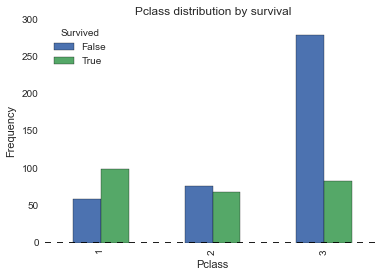

In [31]:
pd.crosstab(X_train.Pclass, y_train.astype(bool)).plot(kind='bar')
plt.title('Pclass distribution by survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

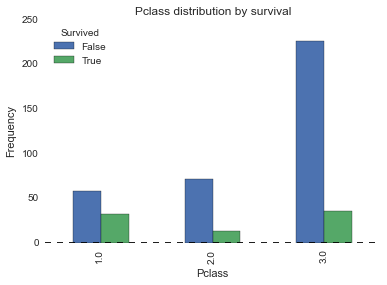

In [70]:
# survival rates of men by class
pd.crosstab(X_train.Pclass[X_train.Gender == 1], y_train.astype(bool)).plot(kind='bar')
plt.title('Pclass distribution by survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

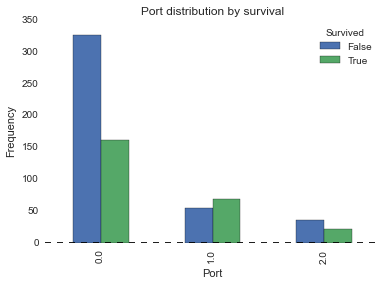

In [33]:
pd.crosstab(X_train.Port, y_train.astype(bool)).plot(kind='bar')
plt.title('Port distribution by survival')
plt.xlabel('Port')
plt.ylabel('Frequency')

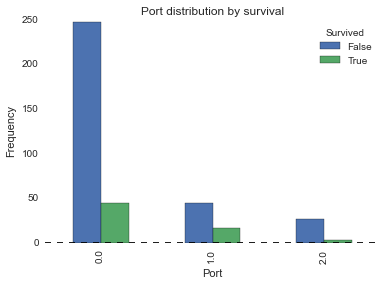

In [94]:
# survival of men by port
pd.crosstab(X_train.Port[(X_train.AgeFill > 18) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('Port distribution by survival')
plt.xlabel('Port')
plt.ylabel('Frequency')

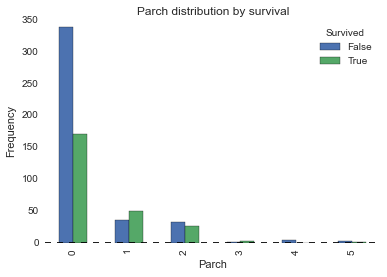

In [35]:
pd.crosstab(X_train.Parch, y_train.astype(bool)).plot(kind='bar')
plt.title('Parch distribution by survival')
plt.xlabel('Parch')
plt.ylabel('Frequency')

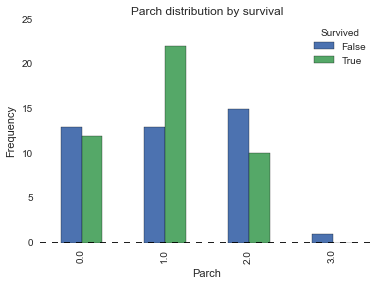

In [36]:
# survival of children by number of parents (because unlikely they have children)
pd.crosstab(X_train.Parch[X_train.AgeFill < 18], y_train.astype(bool)).plot(kind='bar')
plt.title('Parch distribution by survival')
plt.xlabel('Parch')
plt.ylabel('Frequency')

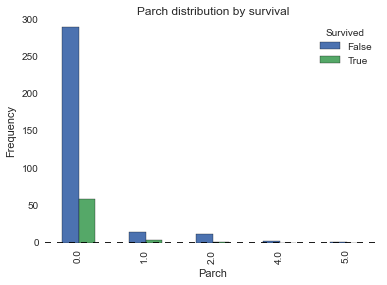

In [116]:
# survival of men by number of children (because unlikely they have parents)
pd.crosstab(X_train.Parch[(X_train.AgeFill > 18) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('Parch distribution by survival')
plt.xlabel('Parch')
plt.ylabel('Frequency')

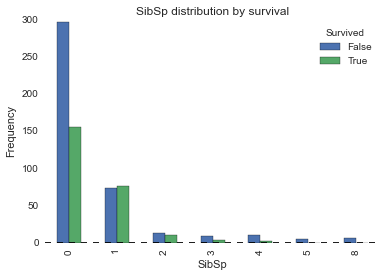

In [37]:
# survival of all passengers by # of siblings/spouses
pd.crosstab(X_train.SibSp, y_train.astype(bool)).plot(kind='bar')
plt.title('SibSp distribution by survival')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

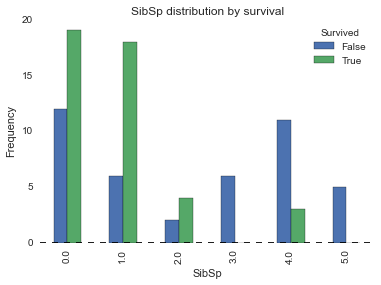

In [38]:
# survival of children by # of siblings (because unlikely they have spouses)
pd.crosstab(X_train.SibSp[X_train.AgeFill < 18], y_train.astype(bool)).plot(kind='bar')
plt.title('SibSp distribution by survival')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

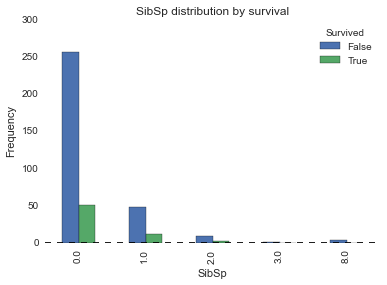

In [115]:
# survival of men by # of spouses (or siblings)
pd.crosstab(X_train.SibSp[(X_train.AgeFill > 18) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('SibSp distribution by survival')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

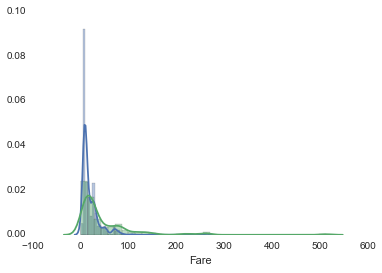

In [13]:
sns.distplot(X_train['Fare'][y_train == 0]) # blue
sns.distplot(X_train['Fare'][y_train == 1]) # green

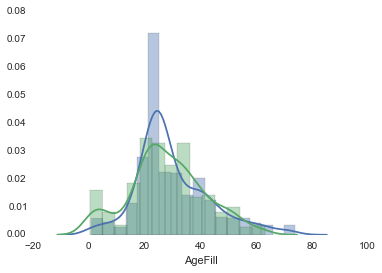

In [14]:
sns.distplot(X_train['AgeFill'][y_train == 0]) # blue
sns.distplot(X_train['AgeFill'][y_train == 1]) # green

In [117]:
X_train[(X_train['AgeFill'] > 18) & (X_train['Pclass'] < 2) & (X_train['Port'] == 1)] 

,Pclass,SibSp,Parch,Fare,Gender,Port,AgeFill
640,1,0,0,69.3000,0,1,24
580,1,1,1,110.8833,0,1,39
555,1,1,0,39.6000,0,1,48
536,1,0,0,106.4250,0,1,30
63,1,0,0,27.7208,1,1,40
792,1,0,0,30.6958,1,1,40
680,1,0,0,76.7292,1,1,27
603,1,0,0,26.5500,1,1,35
556,1,0,0,227.5250,1,1,40
95,1,0,0,34.6542,1,1,71


In [147]:
# men who are in first class and embarqued at port 1 have a survival rate of 42.8% [age, pclass, port, gender]
lst = y_train[(X_train['AgeFill'] > 18) & (X_train['Pclass'] < 2)  & (X_train['Gender'] == 1) & (X_train['Port'] == 1)\
             & (X_train['AgeFill'] < 63)]
sum(lst)/len(lst)

0.46153846153846156

In [126]:
# children younger than 18 in the first or second class predominantly survive
lst = y_train[(X_train['AgeFill'] < 18) & (X_train['Pclass'] < 3)] 
sum(lst)/len(lst)

0.95833333333333337

In [127]:
# mother's with one child in first or second class predominantly survived
lst = y_train[(X_train['AgeFill'] > 18) & (X_train['Parch'] == 1) & (X_train['Pclass'] < 3) & (X_train['Gender'] == 0)] 
sum(lst)/len(lst)

0.95238095238095233

# 3rd class visualizations

In [11]:
thirdClassData = X_train[X_train['Pclass'] == 3]
thirdClassY = y_train[X_train['Pclass'] == 3]

In [10]:
thirdClassData

,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill
221,3,0,0,1,0,51.0,8.0500
857,3,0,0,1,1,25.0,7.2292
161,3,0,0,1,0,26.0,7.7750
47,3,0,0,0,2,21.5,7.7500
38,3,2,0,0,0,18.0,18.0000
423,3,1,1,1,0,18.0,20.2125
418,3,0,2,0,0,10.0,24.1500
22,3,0,0,0,2,15.0,8.0292
295,3,0,0,1,1,23.5,7.2292
170,3,4,1,1,2,4.0,29.1250


In [15]:
# survival predicted if in 3rd class
sum(thirdClassY)/len(thirdClassY)

0.22702702702702704

In [22]:
thirdClassData.groupby(thirdClassY).mean()

,Pclass,SibSp,Parch,Gender,Port,AgeFill,FareFill
Survived,,,,,,,
0,3,0.643357,0.384615,0.790210,0.349650,26.108392,13.641301
1,3,0.428571,0.333333,0.369048,0.690476,21.570476,13.763143


## 3rd class & gender

In [49]:
# survival predicted if in 3rd class and female
lst = thirdClassY[thirdClassData['Gender'] == 0] 
print(sum(lst)/len(lst), len(lst))

0.469026548673 113


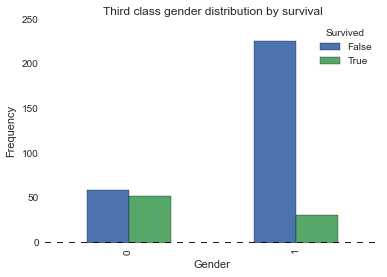

In [23]:
pd.crosstab(thirdClassData.Gender, thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class gender distribution by survival')
plt.xlabel('Gender')
plt.ylabel('Frequency')

In [48]:
# survival predicted if in 3rd class, female, and under 18
lst = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.AgeFill < 18)] 
print(sum(lst)/len(lst), len(lst))

0.52 25


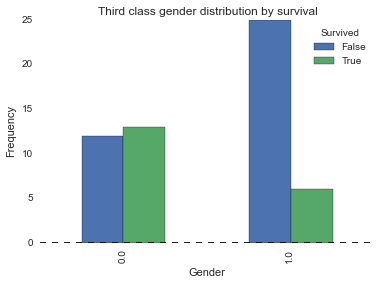

In [27]:
# Distribution of survival by gender for those under 18
pd.crosstab(thirdClassData.Gender[thirdClassData.AgeFill < 18], thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class gender distribution by survival')
plt.xlabel('Gender')
plt.ylabel('Frequency')

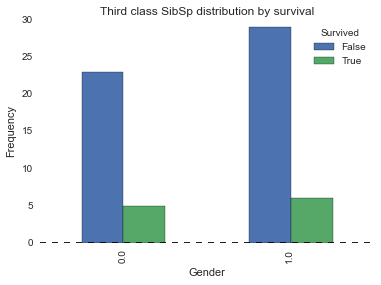

In [54]:
# Distribution of survival by gender for those paying more than 20$
pd.crosstab(thirdClassData.Gender[thirdClassData.FareFill > 20], thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class SibSp distribution by survival')
plt.xlabel('Gender')
plt.ylabel('Frequency')

## 3rd class gender and port

In [53]:
# survival predicted if in 3rd class, female, and port is # 1 or #2
lst = thirdClassY[(thirdClassData['Gender'] == 0) & (thirdClassData.Port >= 1)] 
print(sum(lst)/len(lst), len(lst))

0.690476190476 42


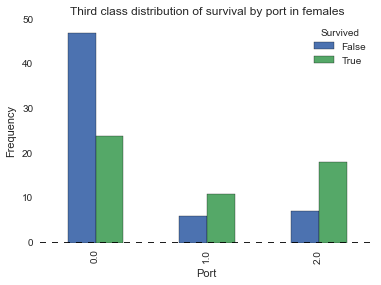

In [45]:
# Distribution of survival by port in females
pd.crosstab(thirdClassData.Port[thirdClassData.Gender == 0], thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class distribution of survival by port in females')
plt.xlabel('Port')
plt.ylabel('Frequency')

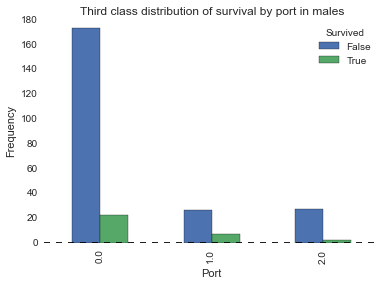

In [50]:
# Distribution of survival by port in males
pd.crosstab(thirdClassData.Port[thirdClassData.Gender == 1], thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class distribution of survival by port in males')
plt.xlabel('Port')
plt.ylabel('Frequency')

## 3rd class and age

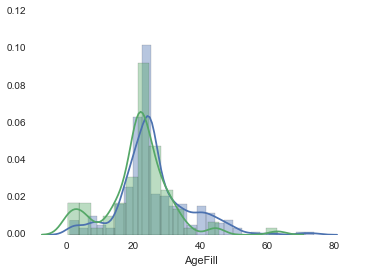

In [16]:
sns.distplot(thirdClassData['AgeFill'][thirdClassY == 0]) # blue
sns.distplot(thirdClassData['AgeFill'][thirdClassY == 1]) # green

## 3rd class and fare

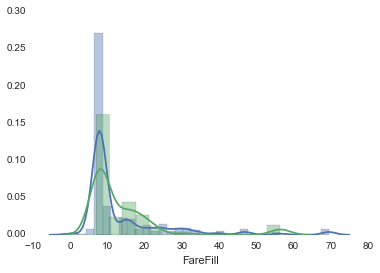

In [18]:
sns.distplot(thirdClassData['FareFill'][thirdClassY == 0]) # blue
sns.distplot(thirdClassData['FareFill'][thirdClassY == 1]) # green

## 3rd class, female, and siblings/spouses

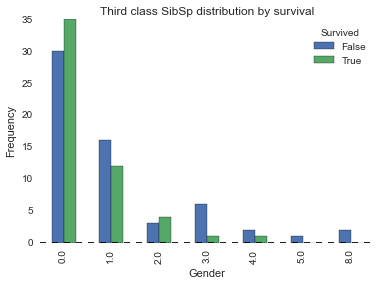

In [31]:
pd.crosstab(thirdClassData.SibSp[thirdClassData.Gender == 0], thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class SibSp distribution by survival')
plt.xlabel('Gender')
plt.ylabel('Frequency')

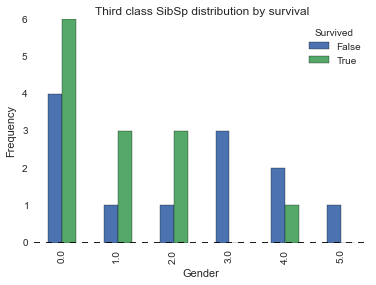

In [36]:
# 3RD class females under 18 with less than 3 siblings are more likely to survive
pd.crosstab(thirdClassData.SibSp[(thirdClassData.Gender == 0) & (thirdClassData.AgeFill < 18)], thirdClassY.astype(bool)).plot(kind='bar')
plt.title('Third class SibSp distribution by survival')
plt.xlabel('Gender')
plt.ylabel('Frequency')